DATASET: [LINK](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


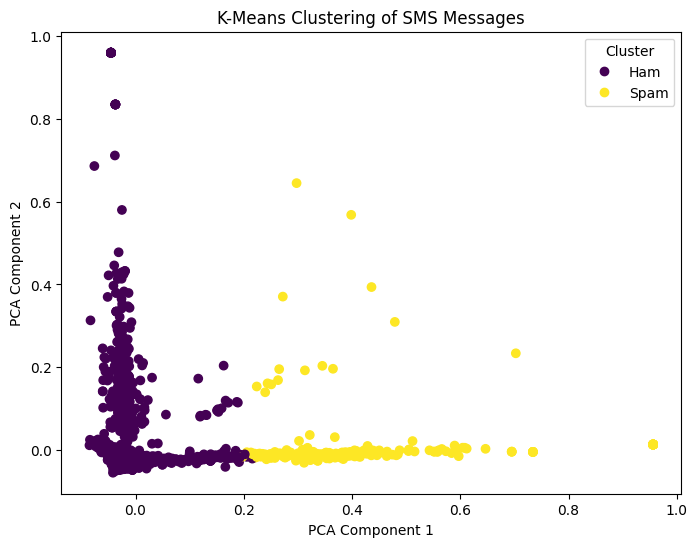

In [65]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin1')
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.columns = ['label', 'message']

vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df['message'])

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_tfidf)

df['cluster'] = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', marker='o')
plt.title("K-Means Clustering of SMS Messages")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

handles, labels = scatter.legend_elements()
plt.legend(handles, ['Ham', 'Spam'], title="Cluster")

plt.show()
